<a href="https://colab.research.google.com/github/Untick/NetOptik/blob/Shironin-Igor-branch/Shiroyby%20Igor/%D1%81%D1%82%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import tensorflow as tf
# from tensorflow import keras

# Библиотеки

In [2]:
# Работа с массивами
import numpy as np
import random                             # Генерация случайных чисел
import pandas as pd
# Генератор аугментированных изображений
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Основа для создания последовательной модели
from tensorflow.keras.models import Sequential
# Основные слои
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
# Оптимизатор
from tensorflow.keras.optimizers import Adam
# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Подключение модуля для загрузки данных из облака
import gdown
# Инструменты для работы с файлами
import os
# Отрисовка графиков
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance       # Инструменты для работы с изображениями
import math                               # Математические функции
import  requests, zipfile
!pip install GitPython
from sklearn.model_selection import train_test_split
# Рисование графиков в ячейках Colab
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.8 MB/s eta 0:00:00


# Загрузка изображений

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# открываем доступ к файлу и получаем ссылку
# https://drive.google.com/file/d/1Ku1Dw9CTQOSvhd5nmkRDb1x70-F4Ttug/view?usp=sharing
f_1 = '1Ku1Dw9CTQOSvhd5nmkRDb1x70-F4Ttug'# нужна только эта часть ссылки
gdown.download(f'https://drive.google.com/uc?id={f_1}', None, quiet=True)

'img.zip'

In [5]:
# Разархивация датасета в директорию 'content/TOTAL_folder'
!unzip -qo "img.zip" -d /content/img

Комбинированный 250/:  mismatching "local" filename (╨Ъ╨╛╨╝╨▒╨╕╨╜╨╕╤А╨╛╨▓╨░╨╜╨╜╤Л╨╣ 250/),
         continuing with "central" filename version
Комбинированный 250/aigner-ea317-423-s2-1 (3).jpg:  mismatching "local" filename (╨Ъ╨╛╨╝╨▒╨╕╨╜╨╕╤А╨╛╨▓╨░╨╜╨╜╤Л╨╣ 250/aigner-ea317-423-s2-1 (3).jpg),
         continuing with "central" filename version
Комбинированный 250/aigner-ea317-423-s2-2 (2).jpg:  mismatching "local" filename (╨Ъ╨╛╨╝╨▒╨╕╨╜╨╕╤А╨╛╨▓╨░╨╜╨╜╤Л╨╣ 250/aigner-ea317-423-s2-2 (2).jpg),
         continuing with "central" filename version
Комбинированный 250/alexander-mcqueen-amq4257-8sm-s2-1 (3).jpg:  mismatching "local" filename (╨Ъ╨╛╨╝╨▒╨╕╨╜╨╕╤А╨╛╨▓╨░╨╜╨╜╤Л╨╣ 250/alexander-mcqueen-amq4257-8sm-s2-1 (3).jpg),
         continuing with "central" filename version
Комбинированный 250/alexander-mcqueen-amq4257-8sm-s2-2 (2).jpg:  mismatching "local" filename (╨Ъ╨╛╨╝╨▒╨╕╨╜╨╕╤А╨╛╨▓╨░╨╜╨╜╤Л╨╣ 250/alexander-mcqueen-amq4257-8sm-s2-2 (2).jpg),
         continuing with "central" filename version
К

In [6]:
!rm /content/img/Комбинированный\ 250/desktop.ini
!rm /content/img/Металл\ 418/desktop.ini
!rm /content/img/Пластик\ 500/desktop.ini

In [7]:

# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH = '/content/img/'
os.listdir(IMAGE_PATH)

['Комбинированный 250', 'Пластик 500', 'Металл 418']

# Cоздание списков путей к файлам и меток к ним

In [8]:
# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH)) # можно не сортировать CLASS_LIST = os.listdir(IMAGE_PATH)
# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)
# Проверка результата
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 3, метки классов: ['Комбинированный 250', 'Металл 418', 'Пластик 500']


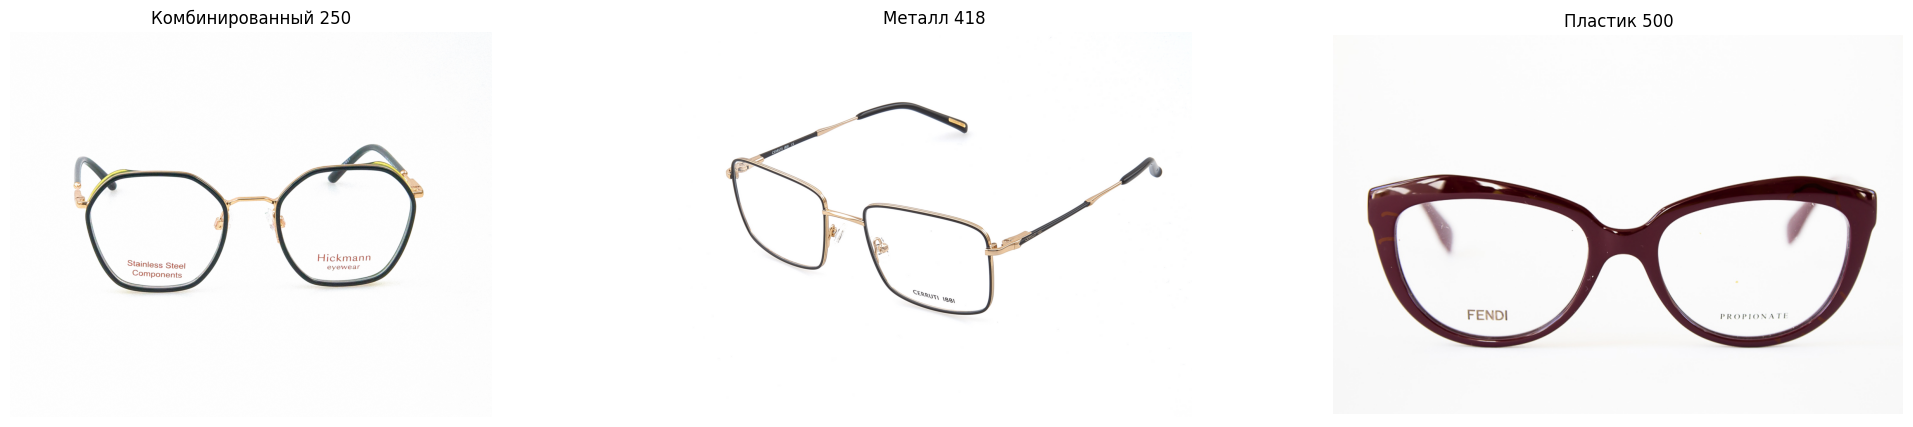

In [9]:
# Создание заготовки для изображений всех классов
fig, axs = plt.subplots(1, CLASS_COUNT, figsize=(25, 5))

# Для всех номеров классов:
for i in range(CLASS_COUNT):
    # Формирование пути к папке содержимого класса
    path = f'{IMAGE_PATH}{CLASS_LIST[i]}/'
    # Выбор случайного фото из i-го класса
    img_path = path + random.choice(os.listdir(path))
    # Отображение фотографий
    axs[i].set_title(CLASS_LIST[i])
    axs[i].imshow(Image.open(img_path))
    axs[i].axis('off')

# Отрисовка всего полотна
plt.show()

In [10]:
data_files = []                           # Cписок путей к файлам картинок
data_labels = []                          # Список меток классов, соответствующих файлам


for class_label in range(CLASS_COUNT):    # Для всех классов по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен
    class_path = IMAGE_PATH + class_name  # Формирование полного пути к папке с изображениями класса
    class_files = os.listdir(class_path)  # Получение списка имен файлов с изображениями текущего класса
    print(f'Размер класса {class_name} составляет {len(class_files)} фото')

    # Добавление к общему списку всех файлов класса с добавлением родительского пути
    data_files += [f'{class_path}/{file_name}' for file_name in class_files]

    # Добавление к общему списку меток текущего класса - их ровно столько, сколько файлов в классе
    data_labels += [class_label] * len(class_files)
    print('Общий размер базы для обучения:', len(data_labels))

Размер класса Комбинированный 250 составляет 514 фото
Общий размер базы для обучения: 514
Размер класса Металл 418 составляет 418 фото
Общий размер базы для обучения: 932
Размер класса Пластик 500 составляет 499 фото
Общий размер базы для обучения: 1431


# просмотр фото

(675, 450)
2


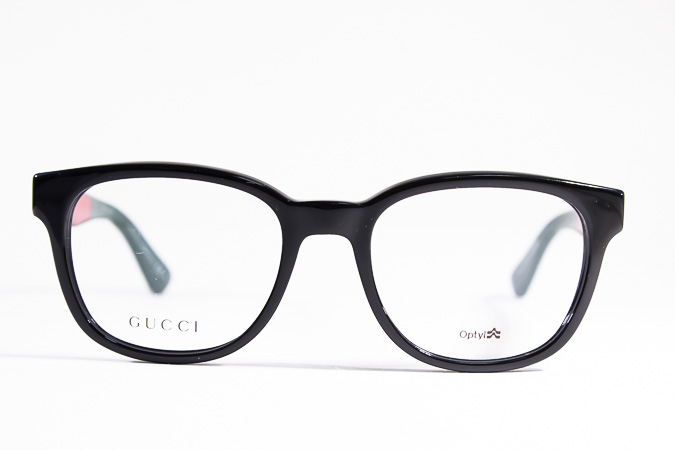

In [11]:
img  = Image.open(data_files[1300])
print(img.size)
print(data_labels[1300])
img

# Подготовка выборок

In [12]:
from tensorflow.keras.preprocessing import image
data_images = []
for i in range(len(data_files)):
  # изменение размера и нормализация
  img  = np.array(image.load_img(data_files[i], target_size=(128, 64)))/255
# создание общего спика изображений
  data_images +=[img]


In [13]:

print(data_images[600].size)
print(data_labels[600])
data_images[600]

24576
1


array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.99607843, 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [0.98823529, 0.99607843, 0.99215686]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.99215686, 1.        , 0.99607843],
        [0.99215686, 1.        , 0.99607843],
        [0.99607843, 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.99607843, 1.        , 1.        ],
        [0.99607843, 1.        , 1.        ],
        [0.99215686, 1.        , 0.99607843]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [14]:
x_data = np.array(data_images)            # Перевод общего списка изображений в numpy-массив
y_data = np.array(data_labels)            # Перевод общего списка меток класса в numpy-массив
print(f'Общий массив данных изображений следующей формы: {x_data.shape}')
print(f'Общий массив меток классов следующей формы: {y_data.shape}')

Общий массив данных изображений следующей формы: (1431, 128, 64, 3)
Общий массив меток классов следующей формы: (1431,)


In [15]:
# Преобразование данных в формат one_hot_encoding
from tensorflow.keras.utils import to_categorical
y_data = to_categorical(data_labels, 3)
y_data[5]

array([1., 0., 0.], dtype=float32)

In [19]:

x_train, x_test, y_train, y_test = train_test_split(x_data, # ----------------- датасет с изображениям
                                                    y_data, # ----------------- датасет с метками
                                                    test_size = 0.1, # --- процент тестовых значений
                                                    shuffle=True, # ------ перемешивание
                                                    random_state=42) # ---


In [21]:
x_train, x_val, y_train, y_val = train_test_split(x_data, # ----------------- датасет с изображениям
                                                    y_data, # ----------------- датасет с метками
                                                    test_size = 0.2, # --- процент тестовых значений
                                                    shuffle=True, # ------ перемешивание
                                                    random_state=42) # ---
print(f'Общий массив данных изображений следующей формы: {x_train.shape}')
print(f'Общий массив меток классов следующей формы: {y_train.shape}')
print(f'Общий массив данных проверочных изображений следующей формы: {x_val.shape}')
print(f'Общий массив проверочных меток классов следующей формы: {y_val.shape}')
print(f'Общий массив тестовых данных  изображений следующей формы: {x_test.shape}')
print(f'Общий массив тестовых меток классов следующей формы: {y_test.shape}')


Общий массив данных изображений следующей формы: (1144, 128, 64, 3)
Общий массив меток классов следующей формы: (1144, 3)
Общий массив данных проверочных изображений следующей формы: (287, 128, 64, 3)
Общий массив проверочных меток классов следующей формы: (287, 3)
Общий массив тестовых данных  изображений следующей формы: (144, 128, 64, 3)
Общий массив тестовых меток классов следующей формы: (144, 3)


# Cоздание модели

In [34]:
EPOCHS              = 150                # Число эпох обучения
BATCH_SIZE          = 24                    # Размер батча для обучения модели
OPTIMIZER           = Adam(0.0001)
CLASS_COUNT         = 3
IMG_WIDTH           = 128                 # Ширина изображения для нейросети
IMG_HEIGHT          = 64                 # Высота изображения для нейросети
IMG_CHANNELS        = 3

In [35]:
# Создание последовательной модели
model_conv = Sequential()

# Первый сверточный слой
model_conv.add(Conv2D(256, (3, 3), padding='same', activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)))
model_conv.add(BatchNormalization())

# Второй сверточный слой
model_conv.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))

# Третий сверточный слой
model_conv.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model_conv.add(BatchNormalization())
model_conv.add(Dropout(0.2))

# Четвертый сверточный слой
model_conv.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))
model_conv.add(Dropout(0.2))

# Пятый сверточный слой
model_conv.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model_conv.add(BatchNormalization())

# Шестой сверточный слой
model_conv.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))
model_conv.add(Dropout(0.2))

# Слой преобразования многомерных данных в одномерные
model_conv.add(Flatten())

# Промежуточный полносвязный слой
model_conv.add(Dense(2048, activation='relu'))

# Промежуточный полносвязный слой
model_conv.add(Dense(4096, activation='relu'))
# Выходной полносвязный слой с количеством нейронов по количесту классов
model_conv.add(Dense(CLASS_COUNT, activation='softmax'))

In [36]:
    # Вывод сводки
model_conv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 64, 256)      7168      
                                                                 
 batch_normalization_3 (Batc  (None, 128, 64, 256)     1024      
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 64, 256)      590080    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 42, 21, 256)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 42, 21, 256)       590080    
                                                                 
 batch_normalization_4 (Batc  (None, 42, 21, 256)     

In [37]:
model_conv.compile(optimizer=OPTIMIZER,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [38]:
 # Обучение модели с заданными параметрами
history = model_conv.fit( x_train,y_train,
                        epochs=EPOCHS,
                      batch_size=BATCH_SIZE,
                        validation_data=(x_val, y_val))

Epoch 1/150
48/48 [==============================] - 15s 194ms/step - loss: 1.4191 - accuracy: 0.4878 - val_loss: 1.1064 - val_accuracy: 0.3449
Epoch 2/150
48/48 [==============================] - 9s 183ms/step - loss: 0.8220 - accuracy: 0.6049 - val_loss: 1.1788 - val_accuracy: 0.3763
Epoch 3/150
48/48 [==============================] - 9s 188ms/step - loss: 0.6966 - accuracy: 0.6713 - val_loss: 1.6826 - val_accuracy: 0.3763
Epoch 4/150
48/48 [==============================] - 9s 188ms/step - loss: 0.6310 - accuracy: 0.6976 - val_loss: 1.6491 - val_accuracy: 0.3763
Epoch 5/150
48/48 [==============================] - 9s 187ms/step - loss: 0.5872 - accuracy: 0.7378 - val_loss: 2.1994 - val_accuracy: 0.3763
Epoch 6/150
48/48 [==============================] - 9s 188ms/step - loss: 0.5910 - accuracy: 0.7316 - val_loss: 1.7295 - val_accuracy: 0.3763
Epoch 7/150
48/48 [==============================] - 9s 188ms/step - loss: 0.5023 - accuracy: 0.7762 - val_loss: 2.0112 - val_accuracy: 0.376

In [39]:
model_conv.save("model_conv.h5")

In [40]:
# /content/drive/MyDrive/model
model_conv.save(f'/content/drive/MyDrive/model/model_conv.h5')

In [41]:
from tensorflow.keras.models import load_model

loaded_model = load_model("model_conv.h5")

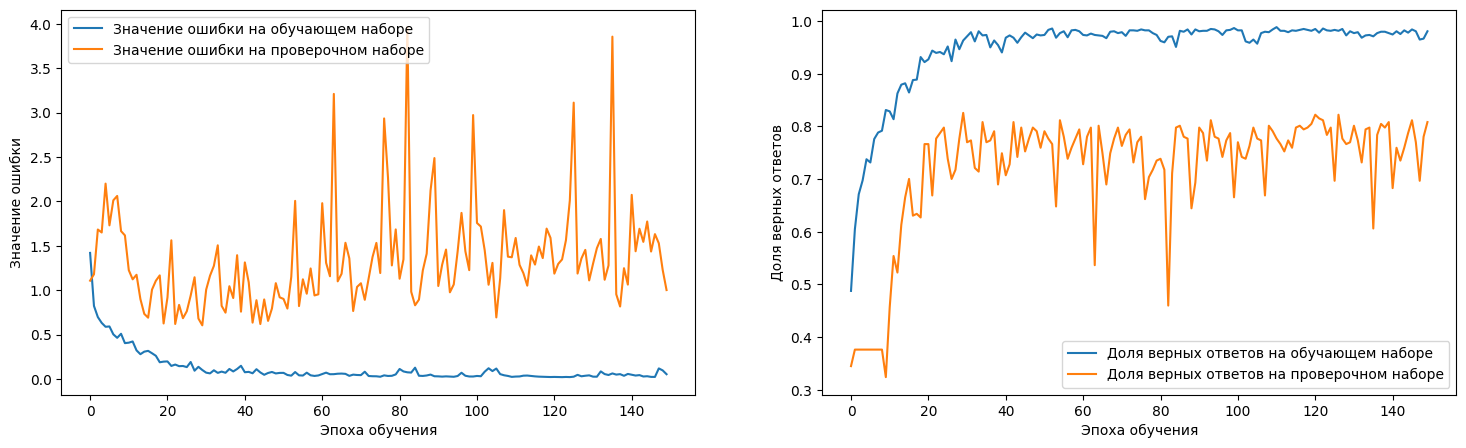

In [42]:
# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
plt.plot(history.history['loss'],
         label='Значение ошибки на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2)
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()